In [42]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
data = pd.read_csv('Data_Combined.csv')

In [46]:
data

,System No,Solute,Solvent 1,Solvent 2,Xs_Exper,x1,x2,Temp,SD_AMR,SD_apol,...,SV1_Si,SV1_MW,SV1_McG_Vol,SV1_VABC,SV2_AMR,SV2_apol,SV2_Si,SV2_MW,SV2_McG_Vol,SV2_VABC
0,1,Paracetamol,Dioxane,Water,0.001900,0.00,1.00,298,44.7549,22.785137,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
1,1,Paracetamol,Dioxane,Water,0.005000,0.10,0.90,298,44.7549,22.785137,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
2,1,Paracetamol,Dioxane,Water,0.012900,0.20,0.80,298,44.7549,22.785137,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
3,1,Paracetamol,Dioxane,Water,0.024400,0.30,0.70,298,44.7549,22.785137,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
4,1,Paracetamol,Dioxane,Water,0.042400,0.40,0.60,298,44.7549,22.785137,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,63,xinafoate,Dioxane,Water,0.182866,0.70,0.30,292,54.4797,26.433551,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
749,63,xinafoate,Dioxane,Water,0.221662,0.80,0.20,292,54.4797,26.433551,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
750,63,xinafoate,Dioxane,Water,0.230201,0.90,0.10,292,54.4797,26.433551,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685
751,63,xinafoate,Dioxane,Water,0.190250,0.95,0.05,292,54.4797,26.433551,...,108.422062,88.05243,0.681,82.964392,0.0,2.135586,24.440081,18.010565,0.1673,17.346685


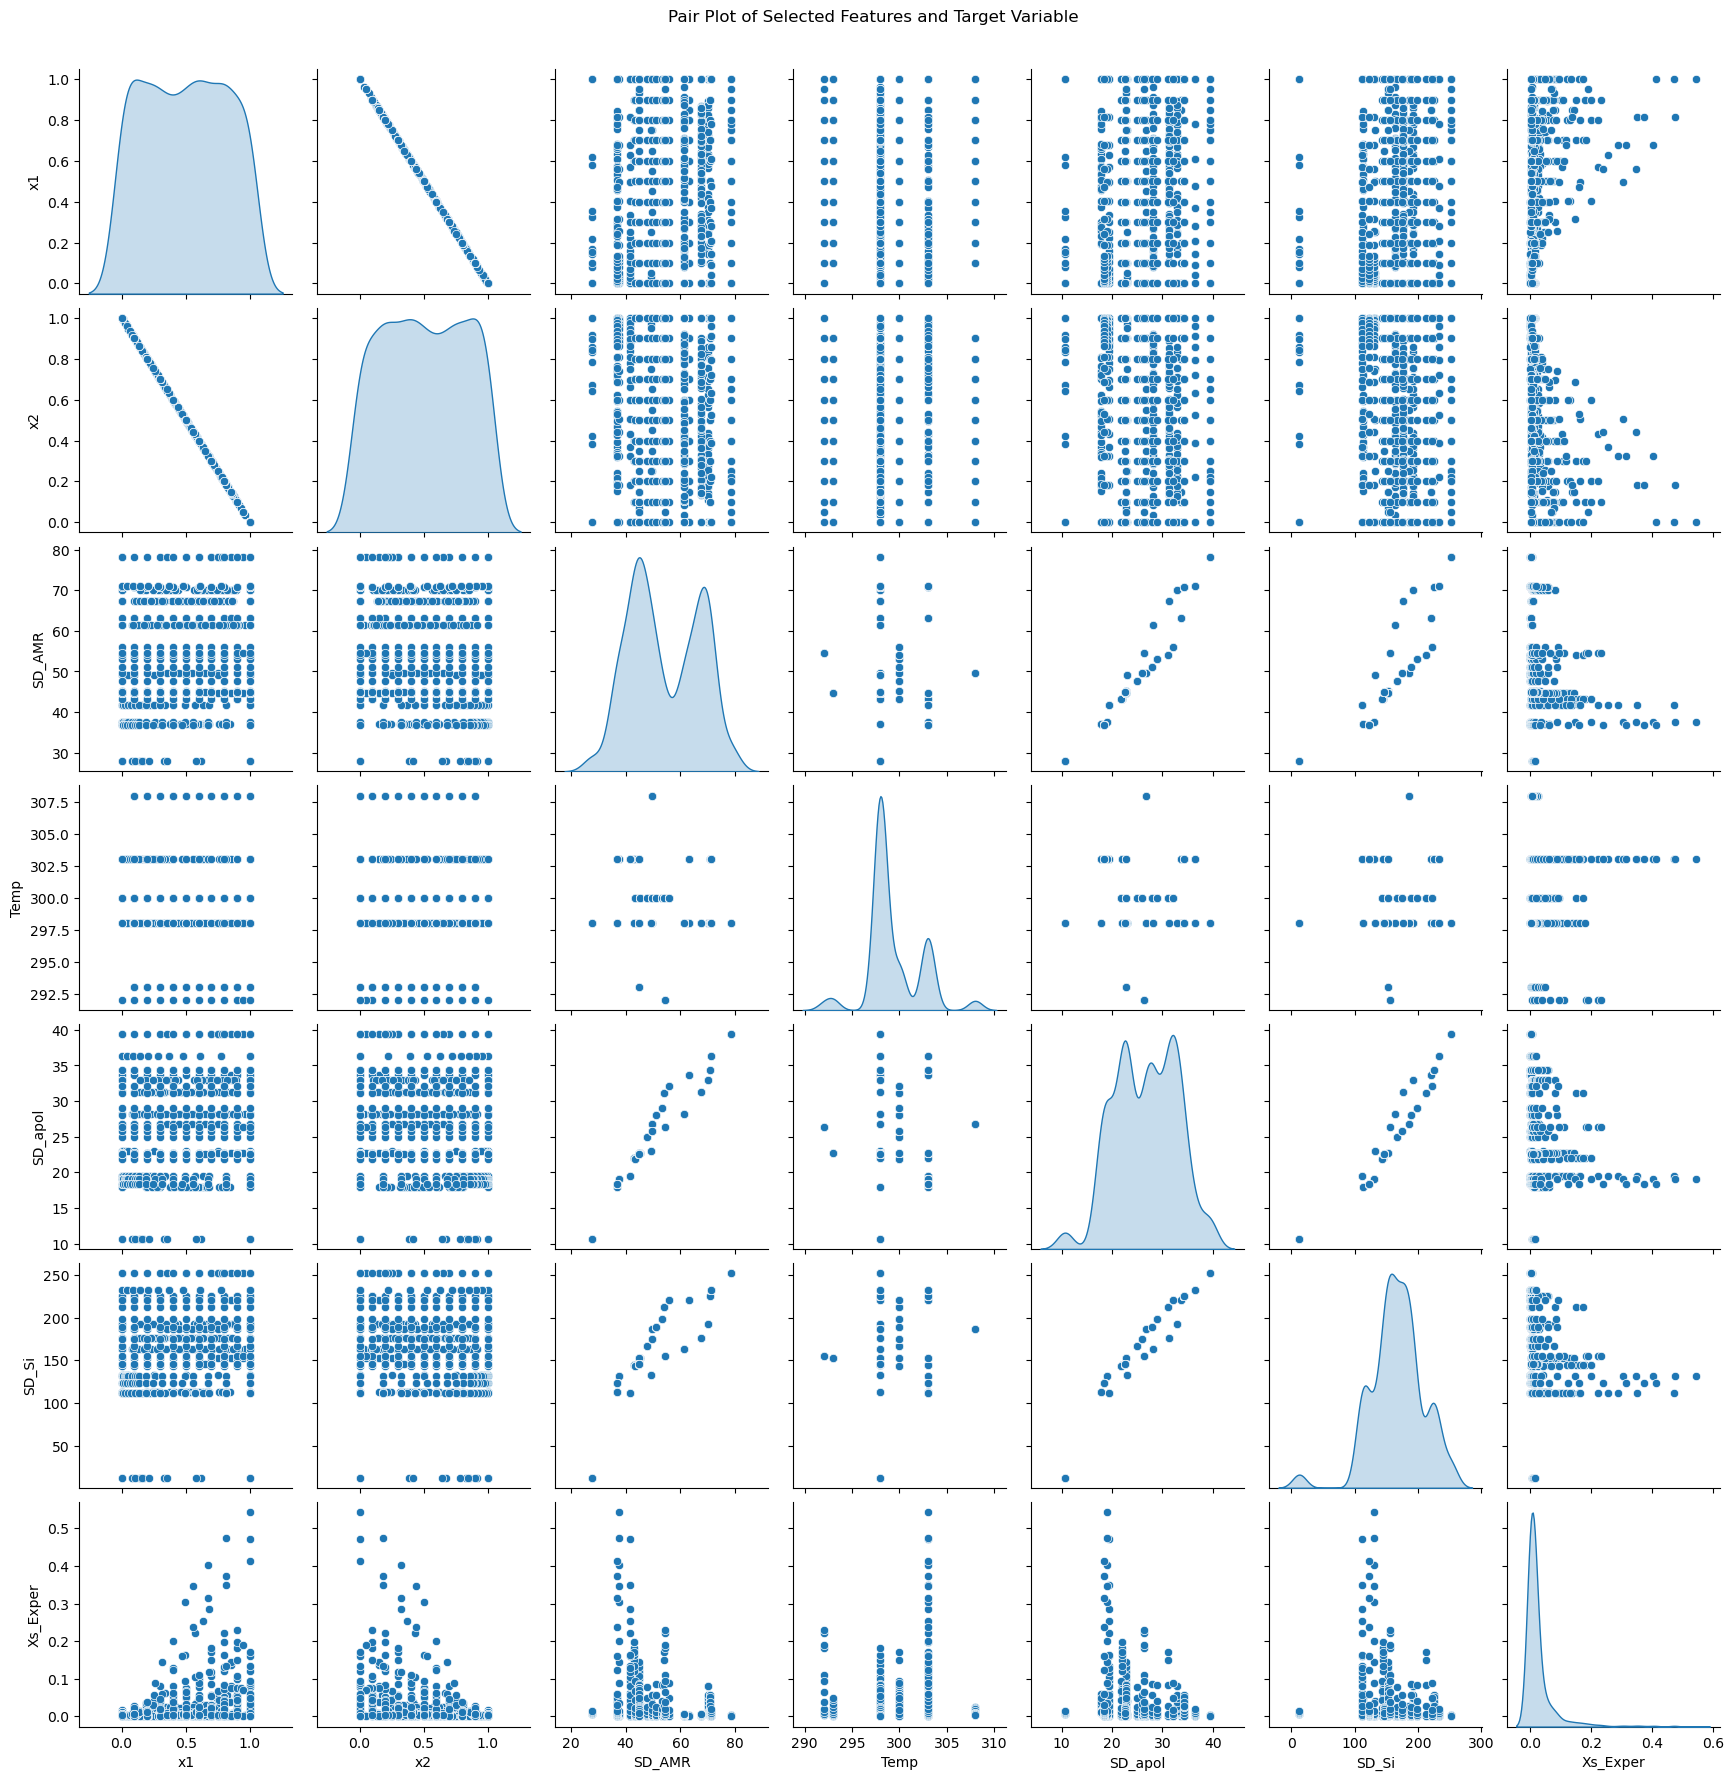

In [185]:
#Checking the relations between the features and the target(Solubility)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Data_Combined.csv')

# Select a subset of features for visualization
features_to_plot = ['x1', 'x2', 'SD_AMR', 'Temp', 'SD_apol', 'SD_Si', 'Xs_Exper']

# Create a pair plot
sns.pairplot(data[features_to_plot], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features and Target Variable', y=1.02)
plt.show()


In [237]:
# Initialize empty lists and DataFrame for predictions and scores
predicted_Xs = []
experimental_Xs = pd.DataFrame()

# Lists to store system-wise scores
l_r2_scores = []
l_mse_scores = []

# Iterate through each system (from 1 to 63)
for system_number in range(1, 64):
    # Select data for the current system
    current_system_data = data.loc[data['System No'] == system_number]
    
    # Define features and target variable
    selected_features = ['x1', 'x2', 'SD_AMR', 'Temp', 'SD_apol', 'SD_Si', 'SD_McG_Vol', 'SD_VABC',
                         'SD_MLFER_A', 'SD_MLFER_BH', 'SD_MLFER_S', 'SD_MLFER_E', 'SD_MW',
                         'SD_TopoPSA', 'SD_SolvAccSA', 'SV1_AMR', 'SV1_apol', 'SV1_Si', 'SV1_MW',
                         'SV1_McG_Vol', 'SV1_VABC', 'SV2_AMR', 'SV2_apol', 'SV2_Si', 'SV2_MW',
                         'SV2_McG_Vol', 'SV2_VABC']
    
    X_features = current_system_data[selected_features]
    y_target = current_system_data['Xs_Exper']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=3)
    
    # Fit linear regression model
    regression_model = LinearRegression().fit(X_train, y_train)
    
    # Predict Xs values for the test set
    predicted_Xs_values = regression_model.predict(X_test)
    
    # Append experimental values to DataFrame
    experimental_Xs = pd.concat([experimental_Xs, y_test])
    
    # Calculate and store scores
    l_r2 = r2_score(y_test, predicted_Xs_values)
    l_mse = mean_squared_error(y_test, predicted_Xs_values)
    
    l_r2_scores.append(r2)
    l_mse_scores.append(mse)
    
# Print results for each system
for j in range(len(l_r2_scores)):
    print(f'System {j+1} - R^2 Score: {l_r2_scores[j]}, MSE: {l_mse_scores[j]}')


System 1 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 2 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 3 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 4 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 5 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 6 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 7 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 8 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 9 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 10 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 11 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 12 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 13 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 14 - R^2 Score: 0.3655611136374485, MSE: 0.0003420379518669887
System 15 - R^2 Score: 0.3655

In [267]:
from sklearn.ensemble import RandomForestRegressor

# Initialize empty lists and DataFrame for predictions and scores
rf_predicted_Xs = []
rf_experimental_Xs = pd.DataFrame()

# Lists to store system-wise scores
r2_scores = []
mse_scores = []

# Iterate through each system (from 1 to 63)
for system_number in range(1, 64):
    # Select data for the current system
    current_system_data = data.loc[data['System No'] == system_number]
    
    # Define features and target variable
    selected_features = ['x1', 'x2', 'SD_AMR', 'Temp', 'SD_apol', 'SD_Si', 'SD_McG_Vol', 'SD_VABC',
                         'SD_MLFER_A', 'SD_MLFER_BH', 'SD_MLFER_S', 'SD_MLFER_E', 'SD_MW',
                         'SD_TopoPSA', 'SD_SolvAccSA', 'SV1_AMR', 'SV1_apol', 'SV1_Si', 'SV1_MW',
                         'SV1_McG_Vol', 'SV1_VABC', 'SV2_AMR', 'SV2_apol', 'SV2_Si', 'SV2_MW',
                         'SV2_McG_Vol', 'SV2_VABC']
    
    X_features = current_system_data[selected_features]
    y_target = current_system_data['Xs_Exper']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=3)
    
    # Fit random forest regression model
    forest_model = RandomForestRegressor(n_estimators=100, random_state=3)
    forest_model.fit(X_train, y_train)
    
    # Predict Xs values for the test set
    rf_predicted_Xs_values = forest_model.predict(X_test)
    
    # Append experimental values to DataFrame
    rf_experimental_Xs = pd.concat([rf_experimental_Xs, y_test])
    
    # Calculate and store scores
    r2 = r2_score(y_test, rf_predicted_Xs_values)
    mse = mean_squared_error(y_test, rf_predicted_Xs_values)
    
    r2_scores.append(r2)
    mse_scores.append(mse)
    
# Print results for each system
for j in range(len(r2_scores)):
    print(f'System {j+1} - R^2 Score: {r2_scores[j]}, MSE: {mse_scores[j]}')


System 1 - R^2 Score: 0.9496081521662407, MSE: 7.575930971428532e-05
System 2 - R^2 Score: 0.9546150065737508, MSE: 0.0003033802677142859
System 3 - R^2 Score: 0.9760366702952332, MSE: 1.476130445642868e-08
System 4 - R^2 Score: 0.7988555045871568, MSE: 1.9488666666666606e-09
System 5 - R^2 Score: 0.807336842105273, MSE: 1.8302999999999159e-10
System 6 - R^2 Score: 0.8576157399744058, MSE: 4.520255305000035e-08
System 7 - R^2 Score: 0.7597860466213916, MSE: 7.860334363333354e-08
System 8 - R^2 Score: 0.7974181731789295, MSE: 7.226557450000086e-06
System 9 - R^2 Score: -12.909346968687316, MSE: 4.175585959999933e-06
System 10 - R^2 Score: -14.673723886639689, MSE: 3.0971278400000095e-06
System 11 - R^2 Score: -16.503103047091656, MSE: 2.9486894266667134e-06
System 12 - R^2 Score: 0.8394299348625862, MSE: 4.5032399296667133e-05
System 13 - R^2 Score: -18.266789428396198, MSE: 2.08980442666671e-06
System 14 - R^2 Score: -0.11044981756262606, MSE: 0.0003778651471066663
System 15 - R^2 Scor

In [52]:
# Define bins for piecewise linear regression
bins = [0, 0.5, 1.0, 1.5]  # Define your own bins based on your data distribution

# Initialize empty lists for predictions and scores
predicted_Xs_piecewise = []
r2_scores_piecewise = []
mse_scores_piecewise = []

# Iterate through each system (from 1 to 63)
for system_number in range(1, 64):
    current_system_data = data.loc[data['System No'] == system_number]
    
    # Define features and target variable
    selected_features = ['x1', 'x2', 'SD_AMR', 'Temp', 'SD_apol', 'SD_Si', 'SD_McG_Vol', 'SD_VABC',
                         'SD_MLFER_A', 'SD_MLFER_BH', 'SD_MLFER_S', 'SD_MLFER_E', 'SD_MW',
                         'SD_TopoPSA', 'SD_SolvAccSA', 'SV1_AMR', 'SV1_apol', 'SV1_Si', 'SV1_MW',
                         'SV1_McG_Vol', 'SV1_VABC', 'SV2_AMR', 'SV2_apol', 'SV2_Si', 'SV2_MW',
                         'SV2_McG_Vol', 'SV2_VABC']
    
    X_features = current_system_data[selected_features]
    y_target = current_system_data['Xs_Exper']
    
    # Fit piecewise linear regression model
    predictions_piecewise = np.zeros_like(y_target)
    for i in range(len(bins) - 1):
        mask = (y_target >= bins[i]) & (y_target < bins[i + 1])
        X_segment = X_features[mask]
        y_segment = y_target[mask]
        
        if len(X_segment) > 0:
            reg = LinearRegression().fit(X_segment, y_segment)
            predictions_piecewise[mask] = reg.predict(X_segment)
    
    # Store predictions and scores
    predicted_Xs_piecewise.append(predictions_piecewise)
    r2_piecewise = r2_score(y_target, predictions_piecewise)
    mse_piecewise = mean_squared_error(y_target, predictions_piecewise)
    r2_scores_piecewise.append(r2_piecewise)
    mse_scores_piecewise.append(mse_piecewise)

# Print results for each system
for j in range(len(r2_scores_piecewise)):
    print(f'System {j+1} - Piecewise Linear Regression - R^2 Score: {r2_scores_piecewise[j]}, MSE: {mse_scores_piecewise[j]}')


System 1 - Piecewise Linear Regression - R^2 Score: 0.51393882425716, MSE: 0.001061162676225845
System 2 - Piecewise Linear Regression - R^2 Score: 0.8083431098207969, MSE: 0.000961517063777038
System 3 - Piecewise Linear Regression - R^2 Score: 0.7613673524927767, MSE: 1.55718864326116e-07
System 4 - Piecewise Linear Regression - R^2 Score: 0.9561546098356393, MSE: 5.964726877959635e-09
System 5 - Piecewise Linear Regression - R^2 Score: 0.8953655586854284, MSE: 4.771676422924014e-10
System 6 - Piecewise Linear Regression - R^2 Score: 0.9520102388914923, MSE: 9.05999699517571e-08
System 7 - Piecewise Linear Regression - R^2 Score: 0.9793461565829865, MSE: 3.84240056842194e-08
System 8 - Piecewise Linear Regression - R^2 Score: 0.7721278656193259, MSE: 0.00010544536369667443
System 9 - Piecewise Linear Regression - R^2 Score: 0.9878916161569704, MSE: 3.2109951292468256e-08
System 10 - Piecewise Linear Regression - R^2 Score: 0.9961274151878647, MSE: 7.735812194846935e-09
System 11 - Pi

In [54]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Initialize empty lists for predictions and scores
predicted_Xs_nn = []
r2_scores_nn = []
mse_scores_nn = []

# Standardize features
scaler = StandardScaler()

# Iterate through each system (from 1 to 63)
for system_number in range(1, 64):
    current_system_data = data.loc[data['System No'] == system_number]
    
    # Define features and target variable
    selected_features = ['x1', 'x2', 'SD_AMR', 'Temp', 'SD_apol', 'SD_Si', 'SD_McG_Vol', 'SD_VABC',
                         'SD_MLFER_A', 'SD_MLFER_BH', 'SD_MLFER_S', 'SD_MLFER_E', 'SD_MW',
                         'SD_TopoPSA', 'SD_SolvAccSA', 'SV1_AMR', 'SV1_apol', 'SV1_Si', 'SV1_MW',
                         'SV1_McG_Vol', 'SV1_VABC', 'SV2_AMR', 'SV2_apol', 'SV2_Si', 'SV2_MW',
                         'SV2_McG_Vol', 'SV2_VABC']
    
    X_features = current_system_data[selected_features]
    y_target = current_system_data['Xs_Exper']
    
    # Standardize features
    X_scaled = scaler.fit_transform(X_features)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.3, random_state=3)
    
    # Fit neural network model
    nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=3)
    nn_model.fit(X_train, y_train)
    
    # Predict Xs values for the test set
    predictions_nn = nn_model.predict(X_test)
    
    # Store predictions and scores
    predicted_Xs_nn.append(predictions_nn)
    r2_nn = r2_score(y_test, predictions_nn)
    mse_nn = mean_squared_error(y_test, predictions_nn)
    r2_scores_nn.append(r2_nn)
    mse_scores_nn.append(mse_nn)

# Print results for each system
for j in range(len(r2_scores_nn)):
    if rf_r2_score_system[l]<0:
    rf_r2_score_system[l] = 0.00001
    print(f'System {j+1} - Neural Network - R^2 Score: {r2_scores_nn[j]}, MSE: {mse_scores_nn[j]}')


System 1 - Neural Network - R^2 Score: -0.8438044044665822, MSE: 0.0027719830674073228
System 2 - Neural Network - R^2 Score: 0.8166525336588948, MSE: 0.0012256034258039442
System 3 - Neural Network - R^2 Score: -4958.843944031738, MSE: 0.003055241797205787
System 4 - Neural Network - R^2 Score: -30153.763105607613, MSE: 0.0002921661492009986
System 5 - Neural Network - R^2 Score: -90224.24437334583, MSE: 8.5713982154679e-05
System 6 - Neural Network - R^2 Score: -384.66680322786175, MSE: 0.0001224371579372452
System 7 - Neural Network - R^2 Score: -152.58947186762592, MSE: 5.0257888294462045e-05
System 8 - Neural Network - R^2 Score: -11.4410393500354, MSE: 0.0004438003497724972
System 9 - Neural Network - R^2 Score: -38289.51154506917, MSE: 0.011494811565829766
System 10 - Neural Network - R^2 Score: -69115.1514686523, MSE: 0.013657351530205725
System 11 - Neural Network - R^2 Score: -76489.91613854819, MSE: 0.012886169672140775
System 12 - Neural Network - R^2 Score: -1.866998915695

In [204]:
# For linear
import numpy as np

# Convert lists to numpy arrays for easier calculations
r2_scores_np = np.array(r2_scores)
mse_scores_np = np.array(mse_scores)

# Calculate Mean Percent Deviation (MPD)
mpd_r2 = np.mean(np.abs((r2_scores_np - np.mean(r2_scores_np)) / np.mean(r2_scores_np))) * 100
mpd_mse = np.mean(np.abs((mse_scores_np - np.mean(mse_scores_np)) / np.mean(mse_scores_np))) * 100

print(f'Mean Percent Deviation (MPD) for R^2 Scores: {mpd_r2:.2f}%')
print(f'Mean Percent Deviation (MPD) for MSE Scores: {mpd_mse:.2f}%')


Mean Percent Deviation (MPD) for R^2 Scores: 133.33%
Mean Percent Deviation (MPD) for MSE Scores: 62.42%


In [60]:
# MPD VALUES
# For RandomFoorrest
import numpy as np

# Convert lists to numpy arrays for easier calculations
r2_scores_np = np.array(r2_scores)
mse_scores_np = np.array(mse_scores)

# Calculate Mean Percent Deviation (MPD)
mpd_r2 = np.mean(np.abs((r2_scores_np - np.mean(r2_scores_np)) / np.mean(r2_scores_np))) * 100
mpd_mse = np.mean(np.abs((mse_scores_np - np.mean(mse_scores_np)) / np.mean(mse_scores_np))) * 100

print(f'Mean Percent Deviation (MPD) for R^2 Scores: {mpd_r2:.2f}%')
print(f'Mean Percent Deviation (MPD) for MSE Scores: {mpd_mse:.2f}%')

Mean Percent Deviation (MPD) for R^2 Scores: 154.64%
Mean Percent Deviation (MPD) for MSE Scores: 162.28%


In [62]:
# MPD VALUES
# For piecewiselinear
import numpy as np

# Convert lists to numpy arrays for easier calculations
r2_scores_piecewise_np = np.array(r2_scores_piecewise)
mse_scores_piecewise_np = np.array(mse_scores_piecewise)

# Calculate Mean Percent Deviation (MPD) for piecewise linear regression
mpd_r2_piecewise = np.mean(np.abs((r2_scores_piecewise_np - np.mean(r2_scores_piecewise_np)) / np.mean(r2_scores_piecewise_np))) * 100
mpd_mse_piecewise = np.mean(np.abs((mse_scores_piecewise_np - np.mean(mse_scores_piecewise_np)) / np.mean(mse_scores_piecewise_np))) * 100

print(f'Mean Percent Deviation (MPD) for Piecewise Linear Regression - R^2 Scores: {mpd_r2_piecewise:.2f}%')
print(f'Mean Percent Deviation (MPD) for Piecewise Linear Regression - MSE Scores: {mpd_mse_piecewise:.2f}%')


Mean Percent Deviation (MPD) for Piecewise Linear Regression - R^2 Scores: 26.17%
Mean Percent Deviation (MPD) for Piecewise Linear Regression - MSE Scores: 139.54%


In [64]:
# MPD VALUES
# For Neural Network
import numpy as np

# Convert lists to numpy arrays for easier calculations
r2_scores_nn_np = np.array(r2_scores_nn)
mse_scores_nn_np = np.array(mse_scores_nn)

# Calculate Mean Percent Deviation (MPD) for neural network regressor
mpd_r2_nn = np.mean(np.abs((r2_scores_nn_np - np.mean(r2_scores_nn_np)) / np.mean(r2_scores_nn_np))) * 100
mpd_mse_nn = np.mean(np.abs((mse_scores_nn_np - np.mean(mse_scores_nn_np)) / np.mean(mse_scores_nn_np))) * 100

print(f'Mean Percent Deviation (MPD) for Neural Network Regression - R^2 Scores: {mpd_r2_nn:.2f}%')
print(f'Mean Percent Deviation (MPD) for Neural Network Regression - MSE Scores: {mpd_mse_nn:.2f}%')


Mean Percent Deviation (MPD) for Neural Network Regression - R^2 Scores: 184.21%
Mean Percent Deviation (MPD) for Neural Network Regression - MSE Scores: 110.67%


In [66]:
#Visuals#
############
###########

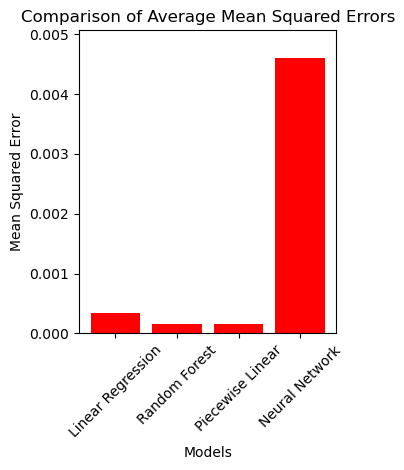

In [269]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mse_scores, mse_scores_piecewise, mse_scores_nn are defined elsewhere

lr_mse_scores = l_mse_scores
rf_mse_scores = mse_scores
plr_mse_scores = mse_scores_piecewise
nn_mse_scores = mse_scores_nn

avg_lr_mse = np.mean(lr_mse_scores)
avg_rf_mse = np.mean(rf_mse_scores)
avg_plr_mse = np.mean(plr_mse_scores)
avg_nn_mse = np.mean(nn_mse_scores)

# Store in dictionary for plotting
model_performance = {
    'Linear Regression': {'MSE': avg_lr_mse},
    'Random Forest': {'MSE': avg_rf_mse},
    'Piecewise Linear': {'MSE': avg_plr_mse},
    'Neural Network': {'MSE': avg_nn_mse},
}

# Extracting model names and MSE scores
models = list(model_performance.keys())
mse_scores = [model_performance[model]['MSE'] for model in models]

# Plotting MSE scores
plt.subplot(1, 2, 2)
plt.bar(models, mse_scores, color='r')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Average Mean Squared Errors')
plt.xticks(rotation=45)
plt.ylim(0, max(mse_scores) * 1.1)

plt.tight_layout()
plt.show()


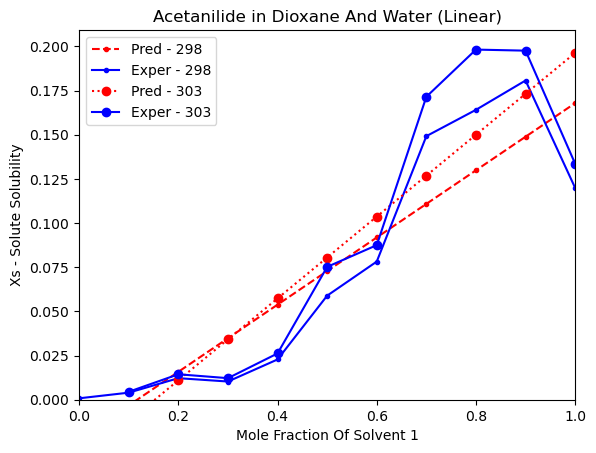

In [159]:
import matplotlib.pyplot as plt

# Filter data for specific conditions
ss_298 = data.loc[(data['Solute '] == 'Acetanilide') & 
                  (data['Solvent 1'] == 'Dioxane') & 
                  (data['Solvent 2'] == 'Water') & 
                  (data['Temp'] == 298)]
ss_303 = data.loc[(data['Solute '] == 'Acetanilide') & 
                  (data['Solvent 1'] == 'Dioxane') & 
                  (data['Solvent 2'] == 'Water') & 
                  (data['Temp'] == 303)]

# Define features and target variable
features = ['x1']  # Adjust based on your actual features

# Extract features and target for system 298
s298_X_train = ss_298[features]
s298_y_train = ss_298['Xs_Exper']

# Random Forest Model for Experiment 308
regression_model.fit(s298_X_train, s298_y_train)

# Random Forest Model for Experiment
s298_Xs_pred = regression_model.predict(s298_X_train)

# Extract features and target for system 303
s303_X_train = ss_303[features]
s303_y_train = ss_303['Xs_Exper']

regression_model.fit(s303_X_train, s303_y_train)

s303_Xs_pred = regression_model.predict(s303_X_train)

# Plotting
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.plot(ss_298['x1'], s298_Xs_pred, 'r.--', ss_298['x1'], ss_298['Xs_Exper'], 'b.-')
plt.plot(ss_303['x1'], s303_Xs_pred, 'ro:', ss_303['x1'], ss_303['Xs_Exper'], 'bo-')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Acetanilide in Dioxane And Water (Linear)')
plt.legend(['Pred - 298', 'Exper - 298', 'Pred - 303', 'Exper - 303'])
plt.show()


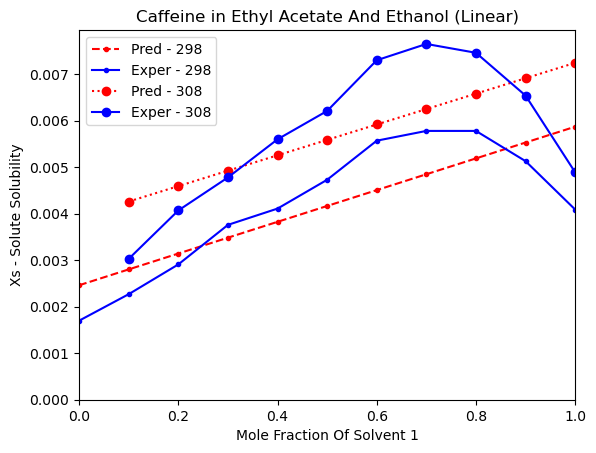

In [161]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data for specific conditions
ss2_298 = data.loc[(data['Solute '] == 'Caffeine') & 
                   (data['Solvent 1'] == 'Ethyl Acetate') & 
                   (data['Solvent 2'] == 'Ethanol') & 
                   (data['Temp'] == 298)]

ss_308 = data.loc[(data['Solute '] == 'Caffeine') & 
                  (data['Solvent 1'] == 'Ethyl Acetate') & 
                  (data['Solvent 2'] == 'Ethanol') & 
                  (data['Temp'] == 308)]

# Define features and target variable
features = ['x1']  # Adjust based on your actual features

# Extract features and target for system 298
s298_X_train = ss2_298[features]
s298_y_train = ss2_298['Xs_Exper']

# Linear Regression Model for Experiment 298
linear_model_298 = LinearRegression().fit(s298_X_train, s298_y_train)
s298_Xs_pred = linear_model_298.predict(s298_X_train)

# Extract features and target for system 308
s308_X_train = ss_308[features]
s308_y_train = ss_308['Xs_Exper']

# Linear Regression Model for Experiment 308
linear_model_308 = LinearRegression().fit(s308_X_train, s308_y_train)
s308_Xs_pred = linear_model_308.predict(s308_X_train)

# Plotting
plt.plot(ss2_298['x1'], s298_Xs_pred, 'r.--', label='Pred - 298')
plt.plot(ss2_298['x1'], ss2_298['Xs_Exper'], 'b.-', label='Exper - 298')
plt.plot(ss_308['x1'], s308_Xs_pred, 'ro:', label='Pred - 308')
plt.plot(ss_308['x1'], ss_308['Xs_Exper'], 'bo-', label='Exper - 308')
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Caffeine in Ethyl Acetate And Ethanol (Linear)')
plt.legend()
plt.show()


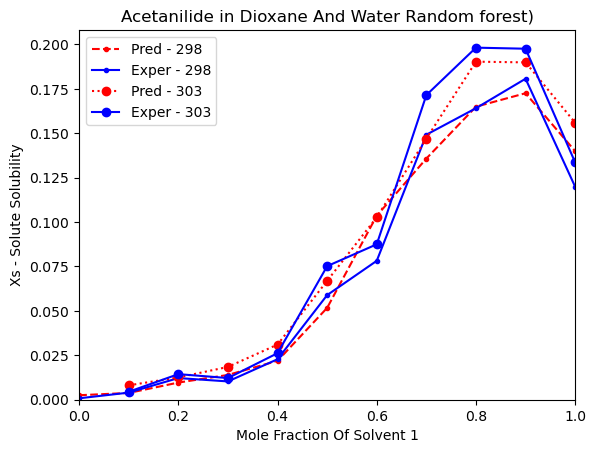

In [163]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Filter data for specific conditions
ss_298 = data.loc[(data['Solute '] == 'Acetanilide') & 
                  (data['Solvent 1'] == 'Dioxane') & 
                  (data['Solvent 2'] == 'Water') & 
                  (data['Temp'] == 298)]

ss_303 = data.loc[(data['Solute '] == 'Acetanilide') & 
                  (data['Solvent 1'] == 'Dioxane') & 
                  (data['Solvent 2'] == 'Water') & 
                  (data['Temp'] == 303)]

# Define features and target variable
features = ['x1']  # Adjust based on your actual features

# Extract features and target for system 298
s298_X_train = ss_298[features]
s298_y_train = ss_298['Xs_Exper']

# Train Random Forest model for Experiment 298
s298_reg = RandomForestRegressor().fit(s298_X_train, s298_y_train)
s298_Xs_pred = s298_reg.predict(s298_X_train)

# Extract features and target for system 303
s303_X_train = ss_303[features]
s303_y_train = ss_303['Xs_Exper']

# Train Random Forest model for Experiment 303
s303_reg = RandomForestRegressor().fit(s303_X_train, s303_y_train)
s303_Xs_pred = s303_reg.predict(s303_X_train)

# Plotting the results
plt.plot(ss_298['x1'], s298_Xs_pred, 'r.--', label='Pred - 298')
plt.plot(ss_298['x1'], ss_298['Xs_Exper'], 'b.-', label='Exper - 298')
plt.plot(ss_303['x1'], s303_Xs_pred, 'ro:', label='Pred - 303')
plt.plot(ss_303['x1'], ss_303['Xs_Exper'], 'bo-', label='Exper - 303')
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Acetanilide in Dioxane And Water Random forest)')
plt.legend()
plt.show()

plt.show()

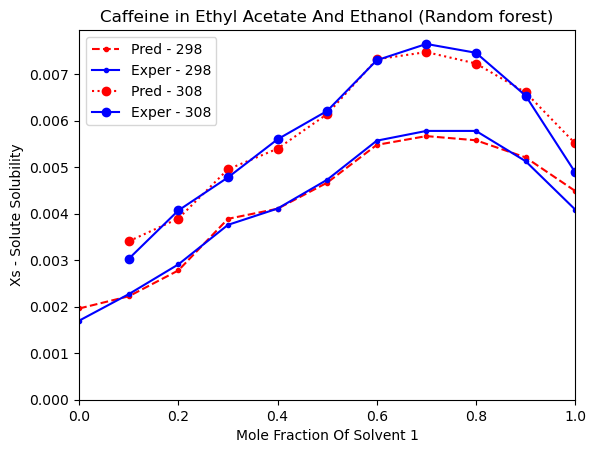

In [165]:
import matplotlib.pyplot as plt

# Filter data for specific conditions
ss2_298 = data.loc[(data['Solute '] == 'Caffeine') & 
                   (data['Solvent 1'] == 'Ethyl Acetate') & 
                   (data['Solvent 2'] == 'Ethanol') & 
                   (data['Temp'] == 298)]

ss_308 = data.loc[(data['Solute '] == 'Caffeine') & 
                  (data['Solvent 1'] == 'Ethyl Acetate') & 
                  (data['Solvent 2'] == 'Ethanol') & 
                  (data['Temp'] == 308)]

s2298_X_train = ss2_298.filter(features, axis=1)
s2298_y_train = ss2_298['Xs_Exper']

s2298_reg = RandomForestRegressor().fit(s2298_X_train, s2298_y_train)
s2298_Xs_pred = s2298_reg.predict(s2298_X_train)

# Random Forest Model for Experiment 308
s308_X_train = ss_303.filter(features, axis=1)
s308_y_train = ss_308['Xs_Exper']

s308_reg = RandomForestRegressor().fit(s308_X_train, s308_y_train)
s308_Xs_pred = s308_reg.predict(s308_X_train)

# Plotting
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.plot(ss2_298['x1'], s2298_Xs_pred, 'r.--', label='Pred - 298')
plt.plot(ss2_298['x1'], ss2_298['Xs_Exper'], 'b.-', label='Exper - 298')
plt.plot(ss_308['x1'], s308_Xs_pred, 'ro:', label='Pred - 308')
plt.plot(ss_308['x1'], ss_308['Xs_Exper'], 'bo-', label='Exper - 308')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Caffeine in Ethyl Acetate And Ethanol (Random forest)')
plt.legend()
plt.show()

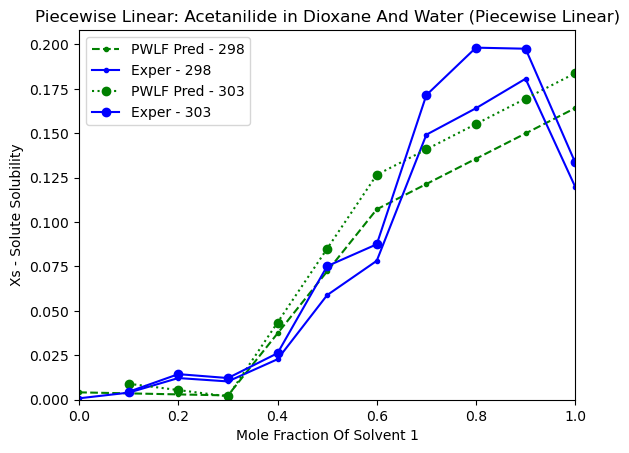

In [167]:
import matplotlib.pyplot as plt
import pwlf

# Filter data for specific conditions
ss_298 = data.loc[(data['Solute '] == 'Acetanilide') & 
                  (data['Solvent 1'] == 'Dioxane') & 
                  (data['Solvent 2'] == 'Water') & 
                  (data['Temp'] == 298)]

ss_303 = data.loc[(data['Solute '] == 'Acetanilide') & 
                  (data['Solvent 1'] == 'Dioxane') & 
                  (data['Solvent 2'] == 'Water') & 
                  (data['Temp'] == 303)]

# Define features and target variable
features = ['x1']  # Adjust based on your actual features

# Extract features and target for system 298
s298_X_train = ss_298[features]
s298_y_train = ss_298['Xs_Exper']

# Extract features and target for system 303
s303_X_train = ss_303[features]
s303_y_train = ss_303['Xs_Exper']

# Piecewise Linear Model for Experiment 298
s298_pwlf = pwlf.PiecewiseLinFit(s298_X_train['x1'], s298_y_train)
breaks = [0, 0.3, 0.6, 1]  # Example break points, adjust as needed
s298_pwlf.fit_with_breaks(breaks)
s298_pwlf_pred = s298_pwlf.predict(s298_X_train['x1'])

# Piecewise Linear Model for Experiment 303
s303_pwlf = pwlf.PiecewiseLinFit(s303_X_train['x1'], s303_y_train)
s303_pwlf.fit_with_breaks(breaks)
s303_pwlf_pred = s303_pwlf.predict(s303_X_train['x1'])

# Plotting Piecewise Linear Results
plt.plot(ss_298['x1'], s298_pwlf_pred, 'g.--', label='PWLF Pred - 298')
plt.plot(ss_298['x1'], ss_298['Xs_Exper'], 'b.-', label='Exper - 298')
plt.plot(ss_303['x1'], s303_pwlf_pred, 'go:', label='PWLF Pred - 303')
plt.plot(ss_303['x1'], ss_303['Xs_Exper'], 'bo-', label='Exper - 303')
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Piecewise Linear: Acetanilide in Dioxane And Water (Piecewise Linear)')
plt.legend()
plt.show()


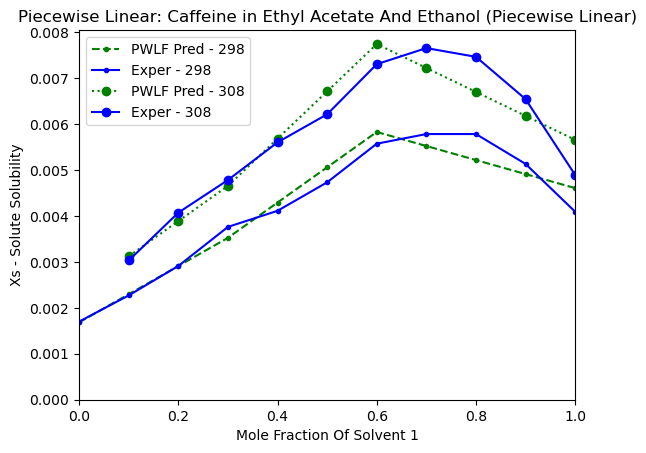

In [169]:
import pwlf

# Filter data for specific conditions
ss2_298 = data.loc[(data['Solute '] == 'Caffeine') & 
                   (data['Solvent 1'] == 'Ethyl Acetate') & 
                   (data['Solvent 2'] == 'Ethanol') & 
                   (data['Temp'] == 298)]

ss_308 = data.loc[(data['Solute '] == 'Caffeine') & 
                  (data['Solvent 1'] == 'Ethyl Acetate') & 
                  (data['Solvent 2'] == 'Ethanol') & 
                  (data['Temp'] == 308)]

# Piecewise Linear Model for Experiment 298
s2298_pwlf = pwlf.PiecewiseLinFit(s2298_X_train['x1'], s2298_y_train)
breaks = [0, 0.3, 0.6, 1]  # Example break points, adjust as needed
s2298_pwlf.fit_with_breaks(breaks)
s2298_pwlf_pred = s2298_pwlf.predict(s2298_X_train['x1'])

# Piecewise Linear Model for Experiment 308
s308_pwlf = pwlf.PiecewiseLinFit(s308_X_train['x1'], s308_y_train)
s308_pwlf.fit_with_breaks(breaks)
s308_pwlf_pred = s308_pwlf.predict(s308_X_train['x1'])

# Plotting Piecewise Linear Results
plt.plot(ss2_298['x1'], s2298_pwlf_pred, 'g.--', label='PWLF Pred - 298')
plt.plot(ss2_298['x1'], ss2_298['Xs_Exper'], 'b.-', label='Exper - 298')
plt.plot(ss_308['x1'], s308_pwlf_pred, 'go:', label='PWLF Pred - 308')
plt.plot(ss_308['x1'], ss_308['Xs_Exper'], 'bo-', label='Exper - 308')
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Piecewise Linear: Caffeine in Ethyl Acetate And Ethanol (Piecewise Linear)')
plt.legend()
plt.show()


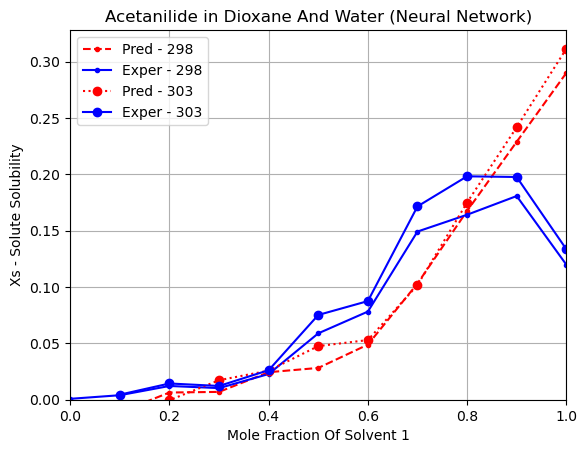

In [171]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Function to filter data and train NN model
def train_nn_model(data, temp, features):
    filtered_data = data.loc[(data['Solute '] == 'Acetanilide') & 
                             (data['Solvent 1'] == 'Dioxane') & 
                             (data['Solvent 2'] == 'Water') & 
                             (data['Temp'] == temp)]
    X_train = filtered_data[features]
    y_train = filtered_data['Xs_Exper']
    model = make_pipeline(StandardScaler(), MLPRegressor(random_state=42, max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    return filtered_data, y_pred, model

# Define features
features = ['x1']  # Adjust based on your actual features

# Train NN models for 298 K and 303 K
ss_298, s298_Xs_pred, model_298 = train_nn_model(data, 298, features)
ss_303, s303_Xs_pred, model_303 = train_nn_model(data, 303, features)

# Plotting the results
plt.plot(ss_298['x1'], s298_Xs_pred, 'r.--', label='Pred - 298')
plt.plot(ss_298['x1'], ss_298['Xs_Exper'], 'b.-', label='Exper - 298')
plt.plot(ss_303['x1'], s303_Xs_pred, 'ro:', label='Pred - 303')
plt.plot(ss_303['x1'], ss_303['Xs_Exper'], 'bo-', label='Exper - 303')
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Acetanilide in Dioxane And Water (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()


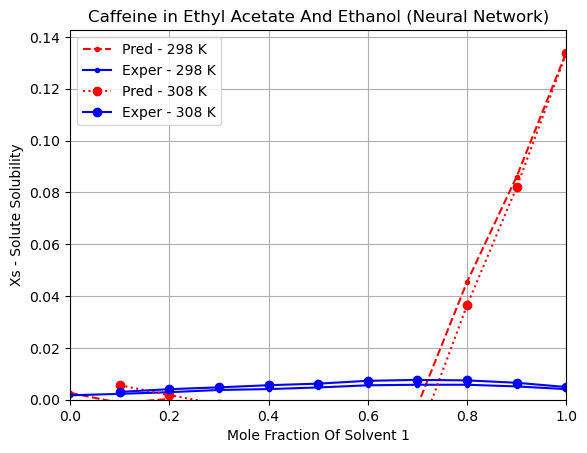

In [173]:
# Function to filter data and train NN model
def train_nn_model(data, temp, features):
    filtered_data = data.loc[(data['Solute '] == 'Caffeine') & 
                             (data['Solvent 1'] == 'Ethyl Acetate') & 
                             (data['Solvent 2'] == 'Ethanol') & 
                             (data['Temp'] == temp)]
    X_train = filtered_data[features]
    y_train = filtered_data['Xs_Exper']
    model = make_pipeline(StandardScaler(), MLPRegressor(random_state=42, max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    return filtered_data, y_pred, model

# Define features
features = ['x1']  # Adjust based on your actual features

# Train NN models for 298 K and 308 K
ss2_298, s2298_Xs_pred, model_298 = train_nn_model(data, 298, features)
ss_308, s308_Xs_pred, model_308 = train_nn_model(data, 308, features)

# Plotting the results
plt.plot(ss2_298['x1'], s2298_Xs_pred, 'r.--', label='Pred - 298 K')
plt.plot(ss2_298['x1'], ss2_298['Xs_Exper'], 'b.-', label='Exper - 298 K')
plt.plot(ss_308['x1'], s308_Xs_pred, 'ro:', label='Pred - 308 K')
plt.plot(ss_308['x1'], ss_308['Xs_Exper'], 'bo-', label='Exper - 308 K')
plt.xlabel('Mole Fraction Of Solvent 1')
plt.ylabel('Xs - Solute Solubility')
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=1)
plt.title('Caffeine in Ethyl Acetate And Ethanol (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()